# US Accidents Exploratory Data Analysis

### About Dataset
- Source: kaggle (https://www.kaggle.com/sobhanmoosavi/us-accidents)
- It contains information about accidents in US
- This analysis may be useful to prevent accidents

In [ ]:
import pandas as pd

### Data Preparation and Cleaning
- Load the dataset
- Look at some information about the data & the columns
- Fix any missing or incorrect values

#### Loading the Dataset

In [ ]:
dataset = pd.read_csv("US_Accidents_Dec20.csv")
dataset.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

- around 42L records
- 49 different features in the dataset
- 18 features of Bool type
- 14 features of float type
- 21 types of object type.
- 1 feature of int type.


In [ ]:
dataset.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


- count of the values of features are less than total count( ie data is missing).

#### Finding missing values

<AxesSubplot:>

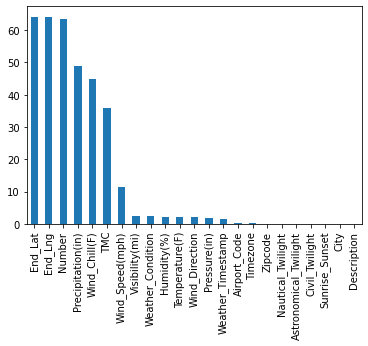

In [ ]:
missing_data = dataset.isnull().sum().sort_values(ascending = False)/len(dataset)*100
missing_data[missing_data !=0].plot(kind = "bar")

- End_Lat, End_Lng and Number has more than 60% of missing data
- Wind_chill and Precipitation have more than 40% of missing data. <br>
So, it's better to drop these features as these features do not contribute much information.

In [ ]:
dataset.drop(["Number"],axis=1,inplace=True)
dataset.drop(["Precipitation(in)"],axis=1,inplace=True)
dataset.drop(["Wind_Chill(F)"],axis=1,inplace=True)
dataset.drop(["End_Lat"],axis=1,inplace=True)
dataset.drop(["End_Lng"],axis=1,inplace=True)

ALso there are some columns which are of no use, it is better to remove those columns: <br>
like the column country we know we are doing analysis on only one country US. so there is no use of that column:

In [ ]:
dataset.drop(["Airport_Code","Zipcode","Country","Timezone", "Pressure(in)", "Wind_Direction", "Wind_Speed(mph)", "Amenity","Give_Way","No_Exit","Roundabout","Stop","Traffic_Calming","Turning_Loop","Astronomical_Twilight","Nautical_Twilight","Civil_Twilight","Sunrise_Sunset","Weather_Timestamp","TMC"],axis=1,inplace=True)

In [ ]:
dataset.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Bump,Crossing,Junction,Railway,Station,Traffic_Signal
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,36.9,91.0,10.0,Light Rain,False,False,False,False,False,False
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,37.9,100.0,10.0,Light Rain,False,False,False,False,False,False
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,36.0,100.0,10.0,Overcast,False,False,False,False,False,True
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,35.1,96.0,9.0,Mostly Cloudy,False,False,False,False,False,False
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,36.0,89.0,6.0,Mostly Cloudy,False,False,False,False,False,True


#### Fixing missing values

##### 1. for Numerical columns

In [ ]:
dataset["Temperature(F)"]=dataset["Temperature(F)"].fillna(dataset["Temperature(F)"].median())
dataset["Humidity(%)"]=dataset["Humidity(%)"].fillna(dataset["Humidity(%)"].median())
dataset["Visibility(mi)"]=dataset["Visibility(mi)"].fillna(dataset["Visibility(mi)"].median())

##### 2. for Categorical columns

Since there are very few missing data in city column. So if we drop those record it will not affect our analysis.

In [ ]:
#droping city and decription
dataset.dropna(subset=["City","Description"],inplace=True)

In [ ]:
#Filling the missing data with mode
dataset["Weather_Condition"]=dataset["Weather_Condition"].fillna(dataset["Weather_Condition"].mode()[0])

In [ ]:
dataset.isna().sum()

ID                   0
Source               0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Street               0
Side                 0
City                 0
County               0
State                0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Weather_Condition    0
Bump                 0
Crossing             0
Junction             0
Railway              0
Station              0
Traffic_Signal       0
dtype: int64

Now our data is clean

### Data Analysis
- Features considered are:
    - State
    - City
    - Start_time (Day, time, month, Year)
    - Start_Lat and Start_Lng (Latitude and Longitude)

#### Analysis of Accidents with respect to state

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

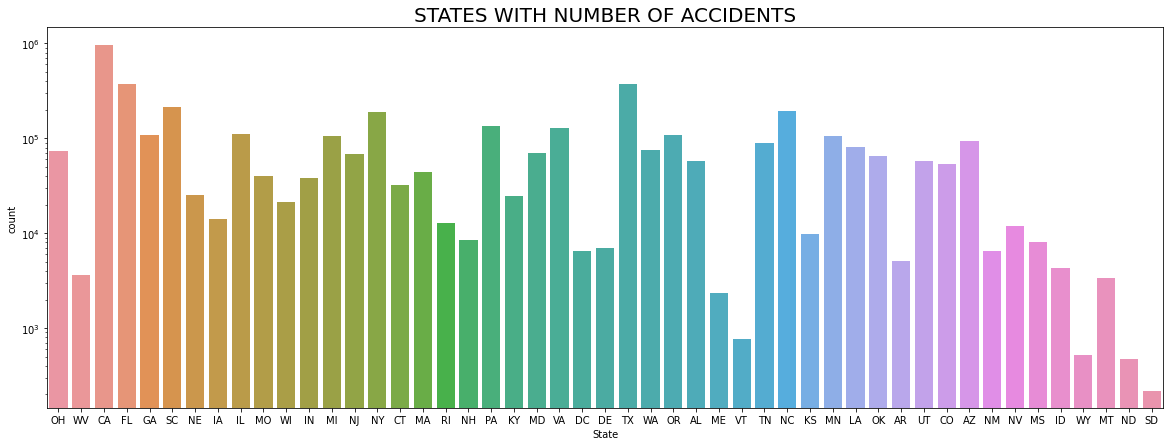

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x="State",data=dataset)
plt.yscale("log")
plt.title("STATES WITH NUMBER OF ACCIDENTS",fontsize=20)
plt.show()

- Highest accidents in California state
- Second and Third highest are texas and Florida.<br>
One of the possible reason could be population.

Since there is no data on population in this dataset, I found the below data on population from internet.

![image.png](attachment:image.png)
Source:
https://www.statista.com/statistics/183497/population-in-the-federal-states-of-the-us/

We can see that even population is highest in California then texas and florida. So population can be a factor of accidents.

#### Analysis of accidents w.r.t cities

In [ ]:
## The number of Unique cites
unique_cities=dataset.City.unique()
len(unique_cities)

12250

In [ ]:
## No of accidents occured per city
accidents_per_cities = dataset.City.value_counts()
accidents_per_cities

Houston           114904
Los Angeles        92701
Charlotte          88887
Dallas             77303
Austin             70538
                   ...  
McConnelsville         1
Arenas Valley          1
Saint Leonard          1
Trevor                 1
West Dennis            1
Name: City, Length: 12250, dtype: int64

In [ ]:
#Top 20 cities with highest accidents
top_cities=dataset["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns=["city","number_of_accidents"]

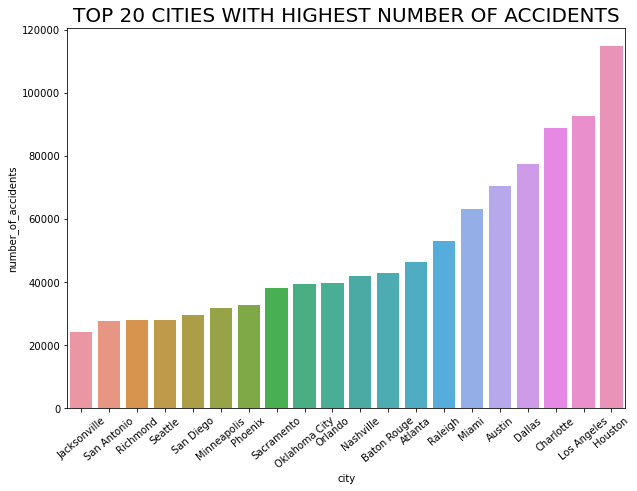

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x="city",y="number_of_accidents",data=top_cities)
plt.title("TOP 20 CITIES WITH HIGHEST NUMBER OF ACCIDENTS",fontsize=20)
plt.xticks(rotation=40)
plt.show()

- Houston is the city with the highest no of the accidents
- Next highest is Los Angeles followed by Charlotte, Dallas and Austin.

Lets see which state these top 10 cities belong to--

In [ ]:
State_city = dataset.groupby(['State','City']).size().nlargest(10)
State_city

State  City       
TX     Houston        114814
CA     Los Angeles     92701
NC     Charlotte       88719
TX     Dallas          76997
       Austin          70250
FL     Miami           63085
NC     Raleigh         52871
GA     Atlanta         46309
LA     Baton Rouge     42814
TN     Nashville       41767
dtype: int64

Thats interesting!! CA is the highest accident state but the highest accident city ie Houston belongs to Texas(which is the 2nd highest state in accidents). Infact in the top 5 cities, 3 cities belongs to Texas and only 1 city belongs to California.

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

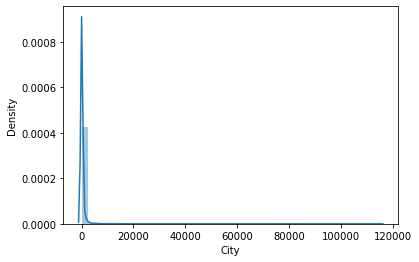

In [ ]:
sns.distplot(accidents_per_cities)

See, majority of the distribution lies around 1-2 accidents. That means most of the cities have around 1-5 accidents.

In [ ]:
len(accidents_per_cities[accidents_per_cities == 1])

1267

1267 cities have only reported only 1 accident. This could be possible because of lack of data or due to outliers.

<AxesSubplot:xlabel='City', ylabel='Count'>

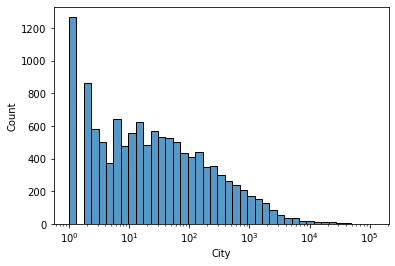

In [ ]:
# Hist plot with log scale to get a clear picture of distribution
sns.histplot(accidents_per_cities,log_scale=True)

Majority of the cities lies in the ditribution where no of accidents < 100

In [ ]:
# Considering high accident cities are the ones where accidents are greater than 1000 otherwise low accident cities.
high_accident_cities = accidents_per_cities[accidents_per_cities>=1000]
low_accident_cities = accidents_per_cities[accidents_per_cities<1000]

In [ ]:
len(high_accident_cities)/len(unique_cities)

0.05746938775510204

- Only 5% of the cities come under high accident cities ie where accidents are >=1000
- Major chunk belongs to low accident cities <br>
Same can be seen in the above log scale hist plot

<AxesSubplot:>

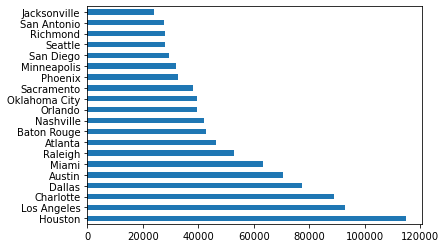

In [ ]:
# plot of top 20 high accident cities
high_accident_cities[:20].plot(kind="barh")

#### Analysis of accidents on the basis of timestamp

In [ ]:
dataset.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
4232536    2019-08-23 18:03:25
4232537    2019-08-23 19:11:30
4232538    2019-08-23 19:00:21
4232539    2019-08-23 19:00:21
4232540    2019-08-23 18:52:06
Name: Start_Time, Length: 4232402, dtype: object

In [ ]:
# conveting the string type to date-time value
dataset.Start_Time=pd.to_datetime(dataset.Start_Time)
dataset.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
4232536   2019-08-23 18:03:25
4232537   2019-08-23 19:11:30
4232538   2019-08-23 19:00:21
4232539   2019-08-23 19:00:21
4232540   2019-08-23 18:52:06
Name: Start_Time, Length: 4232402, dtype: datetime64[ns]

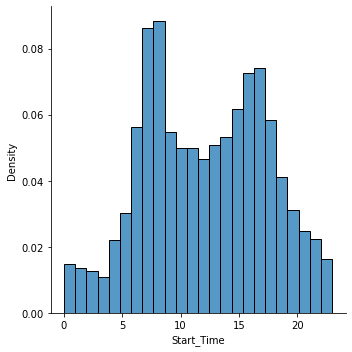

In [ ]:
# plotting the distribution of accident w.r.t to hours of a day
sns.displot(dataset.Start_Time.dt.hour,bins=24, stat="density", kde=False)

- A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work as well as high traffic due to office time)
- Next higest percentage is 3 pm to 6 pm.

In order to cross check the above possibility, lets analyse the accidents w.r.t days of a week

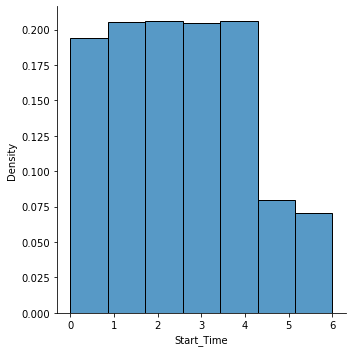

In [ ]:
#plotting the distribution wrt days of the week
sns.displot(dataset.Start_Time.dt.dayofweek,bins=7, stat="density", kde=False)

- weekdays have high accidents compared to weekends and this supports our assumption that we made above.<br>
- evenly distributed across the weekdays.

Is the distribution of accidents by hour the same on weekends as on weekdays.

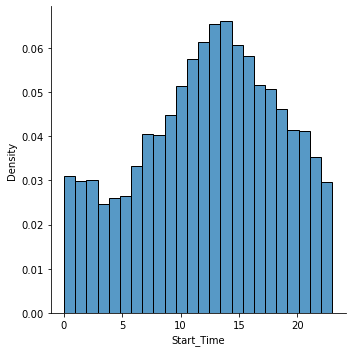

In [ ]:
# plotting a distribution of accidents on weekends wrt to hours of a day.
Weekend_start_time = dataset.Start_Time[dataset.Start_Time.dt.dayofweek>=5]
sns.displot(Weekend_start_time.dt.hour,bins=24, stat="density", kde=False)

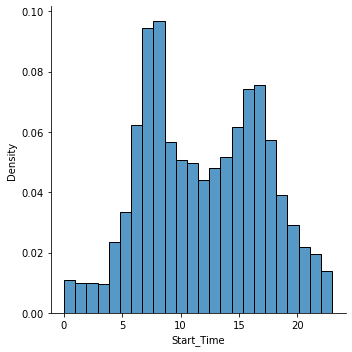

In [ ]:
# plotting a distribution of accidents on Monday wrt to hours of a day.
Weekday_start_time = dataset.Start_Time[dataset.Start_Time.dt.dayofweek == 0]
sns.displot(Weekday_start_time.dt.hour,bins=24, stat="density", kde=False)

- On Weekdays, the peak occurs between 10 am and 6 pm, unlike weekdays

What is the trends of accidents with increase in years??

In [ ]:
yearly_accidents=dataset.Start_Time.dt.year.value_counts().reset_index()
yearly_accidents.columns=["Year","number_of_accidents"]

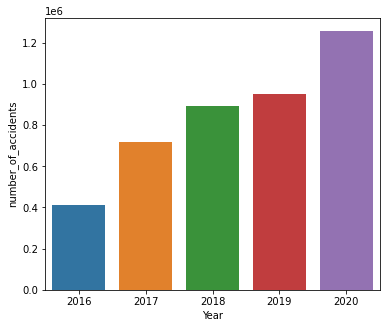

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x="Year",y="number_of_accidents",data=yearly_accidents)
plt.show()

- Increase trend of accidents with increase in years (quite possible due to less data available in 2016 and 2017 as compared to 2020)
- Even Distribution of Accidents in 2018 and 2019
- High increase in accidents from 2018-19 to 2020.

<AxesSubplot:xlabel='Month', ylabel='number_of_accidents'>

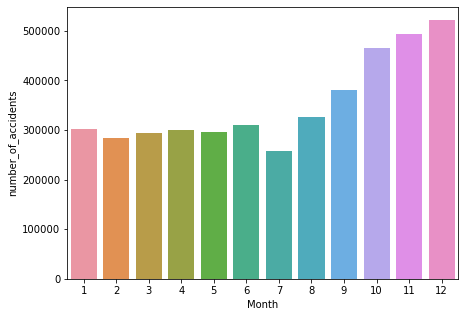

In [ ]:
monthly_accidents=dataset.Start_Time.dt.month.value_counts().reset_index()
monthly_accidents.columns=["Month","number_of_accidents"]
plt.figure(figsize=(7,5))
sns.barplot(x="Month",y="number_of_accidents",data=monthly_accidents)

- No of Accidents are almost even till August
- There is an increase in accidents from september to  December(could be something related to colder days and warmer days)

Is the pattern same for all the years?

In [ ]:
dataset["year"]=pd.DatetimeIndex(dataset["Start_Time"]).year
dataset["month"]=pd.DatetimeIndex(dataset["Start_Time"]).month
monthly_yearly_accidents=dataset[["month","year"]].value_counts().reset_index()
monthly_yearly_accidents.columns=["month","year","number_of_accidents"]

<AxesSubplot:xlabel='month', ylabel='number_of_accidents'>

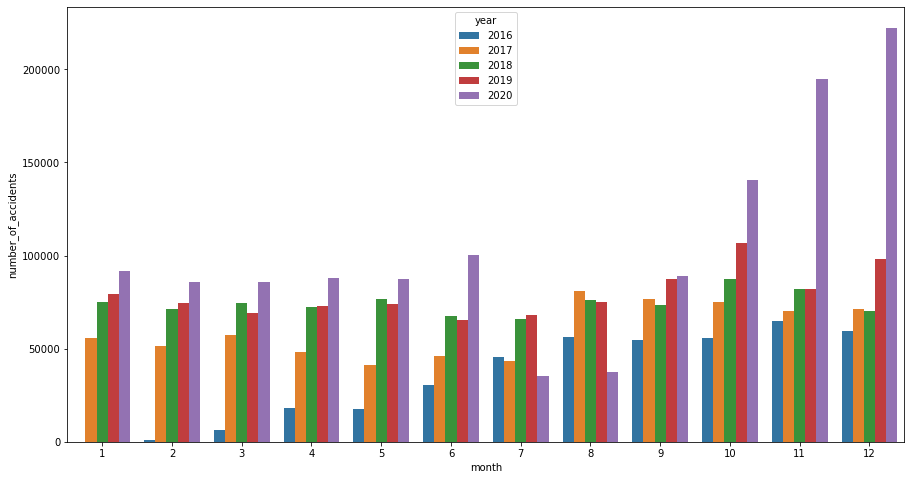

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="month",y="number_of_accidents",hue="year",data=monthly_yearly_accidents)

- Every year, During the month of Aug to Dec, the no of Accidents are higher than rest of the months.
- In 2020, the number increased tremendously during Oct-Dec.
- In 2016, Accidents during Jan-May shows very less ( Probably missing data )

#### Start Latitude and Longitude Analysis

In [ ]:
# considering 10% of data points
sample_df=dataset.sample(int(0.1*len(dataset)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

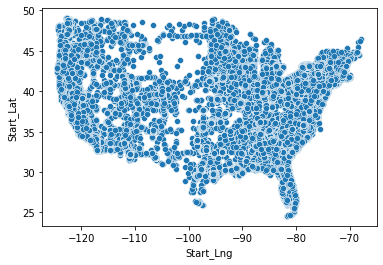

In [ ]:
#ploting the start latitude and longitude
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat)

- Coastal areas have high number of Accidents(probably high population in those areas than land-locked areas

### Summary and Conclusion

Insights:
- Population is a factor of accidents
- The number of accidents per city decreases exponentially
- Around 5% of cities have more than 1000 yearly accidents.
- Over 1200 cities have reported just one accident (need to investigate)
- High number of accidents occur in weekdays than in weekends
- High percentage of accidents occur between 6am to 10 am in Weekdays unlike Weekends ie 10am - 6pm
- Increasing tread of accidents year over year.
- Year 2020 has the highest number of accidents
- Sep-Dec have highest accidents
- Accidents in coastal regions are higher than land bounded regions